# Supplementary Notebook

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from src.cdk.analysis.cytosol import platereader as pr
from src.cdk.analysis.cytosol import widgets as w
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
import src.cdk.logging

log = src.cdk.logging.setup_logging()
pr.plot_setup()

[12/15/24 21:12:28] INFO     Logging initialized                  __init__.py:26


In [2]:
w.data_upload()

In [3]:
data, platemap = pr.load_platereader_data("tests/test_data/cytation_dna_sweep.txt", "tests/test_data/platemap.csv")

In [4]:
platemap

,Well,Experiment,Name,DNA Template,[DNA Template] (ng/uL)
0,B1,Concentration,pT7-deGFP 100,pT7-deGFP (AR-11),100.00
1,B2,Concentration,pT7-deGFP 50,pT7-deGFP (AR-11),50.00
2,B3,Concentration,pT7-deGFP 20,pT7-deGFP (AR-11),20.00
3,B4,Concentration,pT7-deGFP 10,pT7-deGFP (AR-11),10.00
4,B5,Concentration,pT7-deGFP 5,pT7-deGFP (AR-11),5.00
5,B6,Concentration,pT7-deGFP 2,pT7-deGFP (AR-11),2.00
6,B7,Concentration,pT7-deGFP 1,pT7-deGFP (AR-11),1.00
7,B8,Concentration,pT7-deGFP 0,pT7-deGFP (AR-11),0.00
8,C1,Artifact,pT7-lacO-plamGFP 29.3,pT7-lacO-plamGFP (20240622),29.30
9,C2,Artifact,pT7-lacO-plamGFP 35.8,pT7-lacO-plamGFP (20240626),35.80


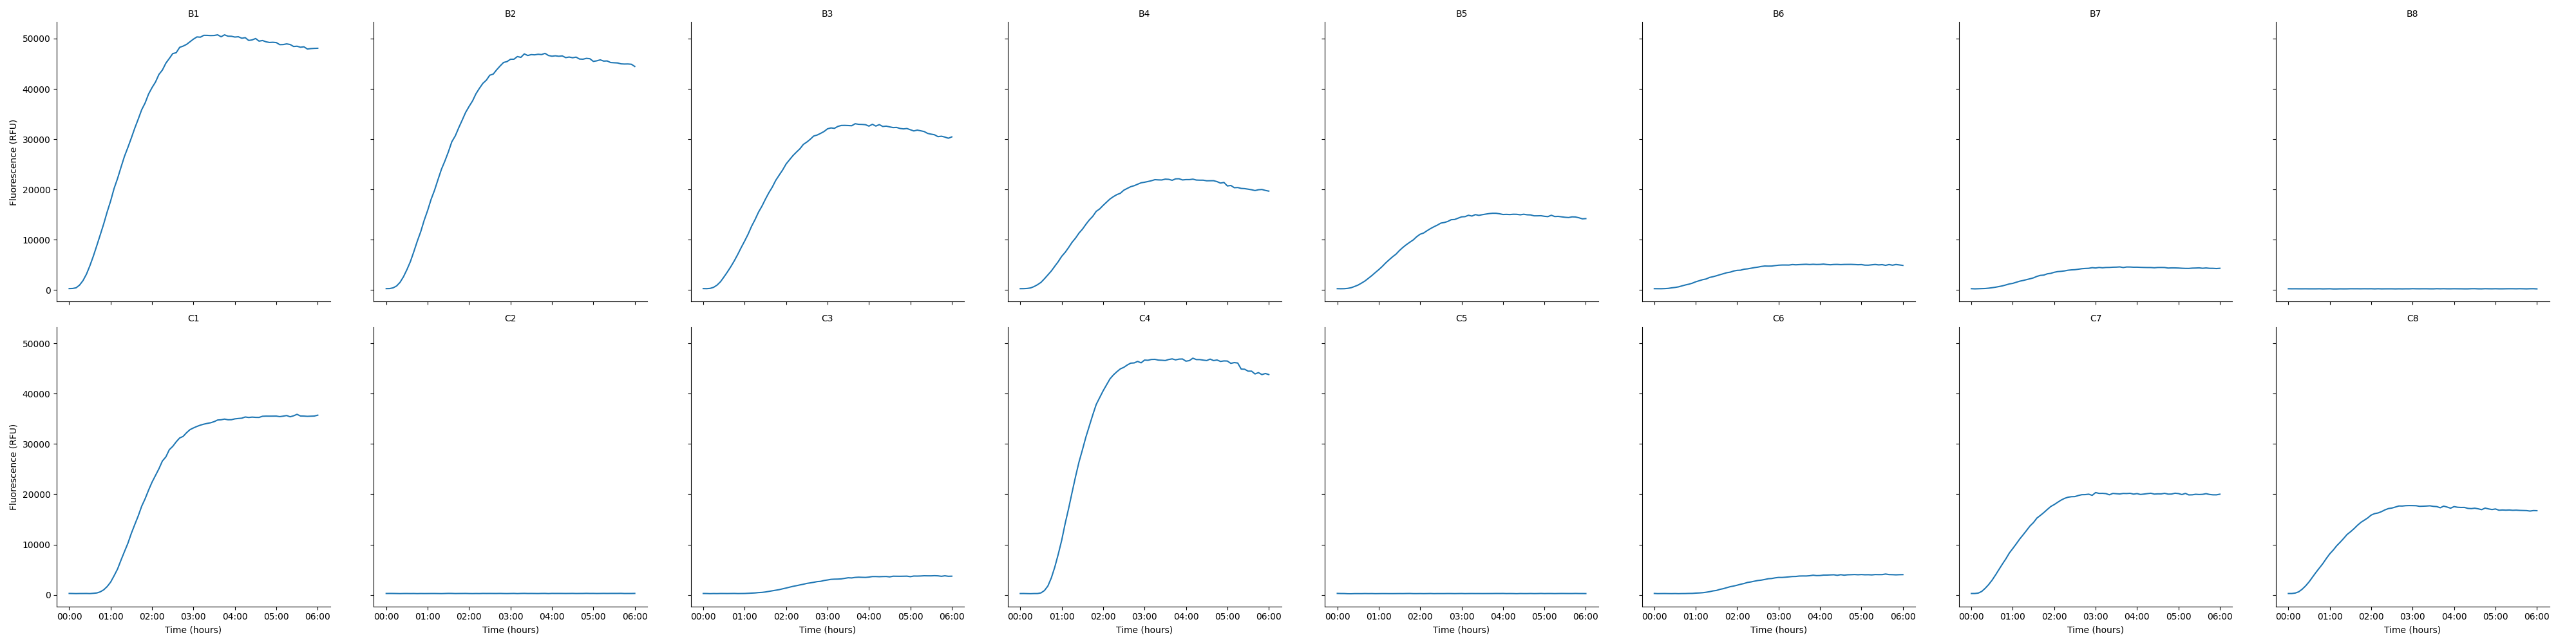

In [17]:
pr.plot_plate(data);

In [18]:
w.interactive_curve_by_experiment(data)

interactive(children=(ToggleButtons(description='Experiment:', options=('Concentration', 'Artifact'), value='C…

In [7]:
# pr.plot_curves_by_name(data=data);
# pr.plot_curves(data, hue="Name", col="Experiment");

In [8]:
data_ss = pr.find_steady_state(data)
data_ss

,,Time_steadystate,Data_steadystate
Well,Read,,
B1,"490,520",0 days 03:30:00,50621.00
B2,"490,520",0 days 03:45:00,46821.00
B3,"490,520",0 days 04:25:00,32592.00
B4,"490,520",0 days 05:55:00,19808.00
B5,"490,520",0 days 04:30:00,15073.00
B6,"490,520",0 days 04:10:00,5075.00
B7,"490,520",0 days 03:20:00,4498.00
B8,"490,520",0 days 03:20:00,253.00
C1,"490,520",0 days 05:10:00,35535.00


interactive(children=(ToggleButtons(description='Experiment:', options=('Concentration', 'Artifact'), value='C…

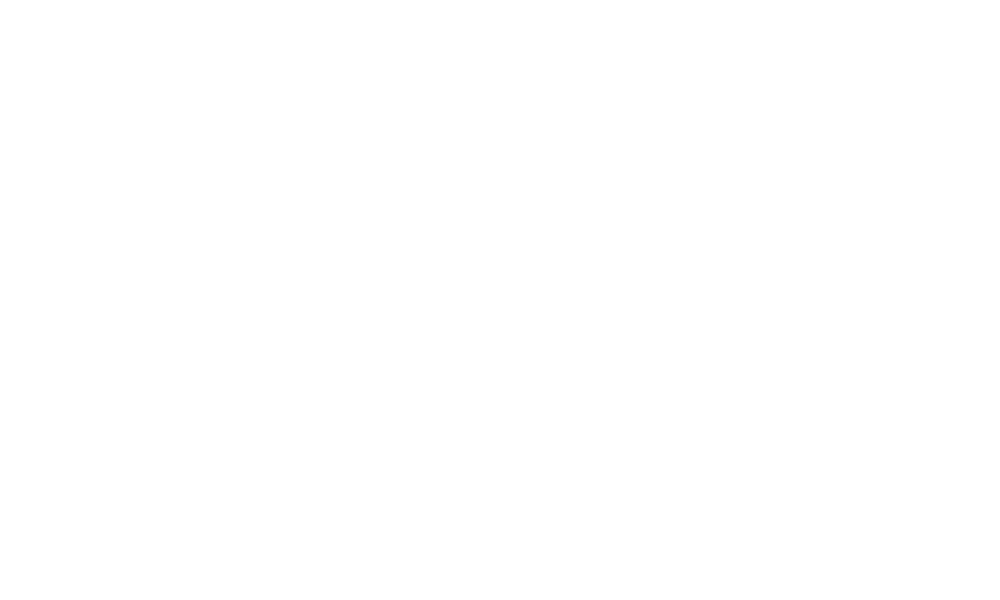

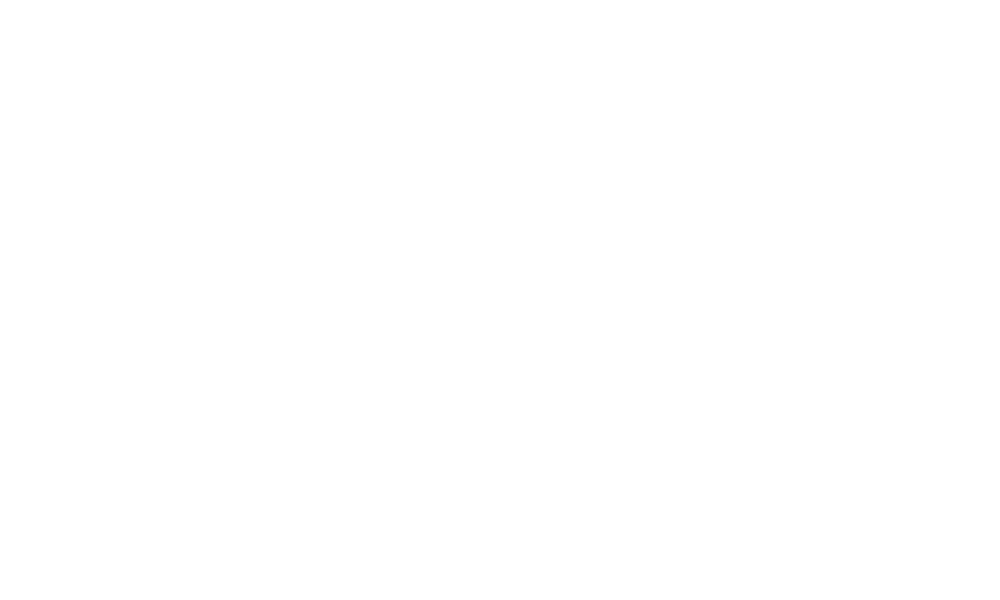

In [16]:
w.interactive_ss_by_experiment(data, data_ss)

In [10]:
# pr.plot_steadystate(data)
# pr.plot_steadystate(data, hue="[DNA Template] (ng/uL)");

In [11]:
data_kinetics = pr.kinetic_analysis(data);
data_kinetics

[12/15/24 21:12:33] WARNING  Failed to solve: Optimal         platereader.py:504
                             parameters not found: Number of                    
                             calls to function has reached                      
                             maxfev = 800.                                      
                    WARNING  Failed to solve: Optimal         platereader.py:504
                             parameters not found: Number of                    
                             calls to function has reached                      
                             maxfev = 800.                                      


Velocity                                      Lag          \
                        Time     Data   Max                      Time    Data   
Well Read                                                                       
B1   490,520 0 days 01:05:00 20189.00  8.28 0 days 00:24:22.696177062 5339.74   
B2   490,520 0 days 00:55:00 13878.00  7.56 0 days 00:24:23.475959418 4818.95   
B3   490,520 0 days 01:10:00 12679.00  5.22 0 days 00:29:31.072796935 3579.02   
B4   490,520 0 days 01:00:00  6700.00  3.50 0 days 00:28:05.714285714 2071.91   
B5   490,520 0 days 01:30:00  7850.00  2.40 0 days 00:35:33.703190014 1864.95   
B6   490,520 0 days 01:20:00  2502.00  1.02 0 days 00:38:59.016393443  872.68   
B7   490,520 0 days 01:35:00  2718.00  0.98 0 days 00:48:46.530612245    0.00   
B8   490,520 0 days 03:00:00   268.00  0.09 0 days 02:12:08.571428571    0.00   
C1   490,520 0 days 01:30:00 12223.00  6.60 0 days 00:59:08.965169107 3770.87   
C2   490,520             NaT      NaN   NaN                       NaT     NaN   
C3   490,520 0 days 02:05:00  1524.00  0.57 0 days 01:20:41.860465116  523.35   
C4   490,520 0 days 01:05:00 14167.00 11.06 0 days 00:43:38.691588785 4762.91   
C5   490,520             NaT      NaN   NaN                       NaT     NaN   
C6   490,520 0 days 01:35:00  1093.00  0.74 0 days 01:10:22.972972973  562.43   
C7   490,520 0 days 00:55:00  8308.00  3.84 0 days 00:18:54.578627281 2148.57   
C8   490,520 0 days 00:55:00  7234.00  3.37 0 days 00:19:11.287128713 1848.80   

                Steady State               Fit               
                        Time     Data        L    k      x0  
Well Read                                                    
B1   490,520 0 days 03:30:00 50621.00 50290.12 0.00 4778.93  
B2   490,520 0 days 03:45:00 46821.00 46486.67 0.00 4884.37  
B3   490,520 0 days 04:25:00 32592.00 32753.46 0.00 5162.19  
B4   490,520 0 days 05:55:00 19808.00 21291.85 0.00 4989.96  
B5   490,520 0 days 04:30:00 15073.00 15073.09 0.00 5411.88  
B6   490,520 0 days 04:10:00  5075.00  5093.57 0.00 5063.40  
B7   490,520 0 days 03:20:00  4498.00     0.00 0.00    0.00  
B8   490,520 0 days 03:20:00   253.00     0.00 0.00    0.00  
C1   490,520 0 days 05:10:00 35535.00 35013.27 0.00 6447.70  
C2   490,520             NaT      NaN      NaN  NaN     NaN  
C3   490,520 0 days 03:55:00  3464.00  3673.27 0.00 8207.27  
C4   490,520 0 days 03:55:00 46897.00 46427.49 0.00 4904.73  
C5   490,520             NaT      NaN      NaN  NaN     NaN  
C6   490,520 0 days 04:45:00  4008.00  3949.34 0.00 7376.26  
C7   490,520 0 days 04:25:00 20034.00 20073.07 0.00 4012.84  
C8   490,520 0 days 05:30:00 16839.00 17333.19 0.00 3952.78

In [14]:
w.interactive_curve_by_well(data, data_kinetics)

interactive(children=(ToggleButtons(description='Well:', options=('B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B…

ToggleButtons(description='Experiment:', options=('Concentration', 'Artifact'), value='Concentration')

Dropdown(description='Property:', index=1, options=('Velocity', 'Lag', 'Steady State', 'Fit'), value='Lag')

Dropdown(description='Item:', options=(), value=None)

Output()

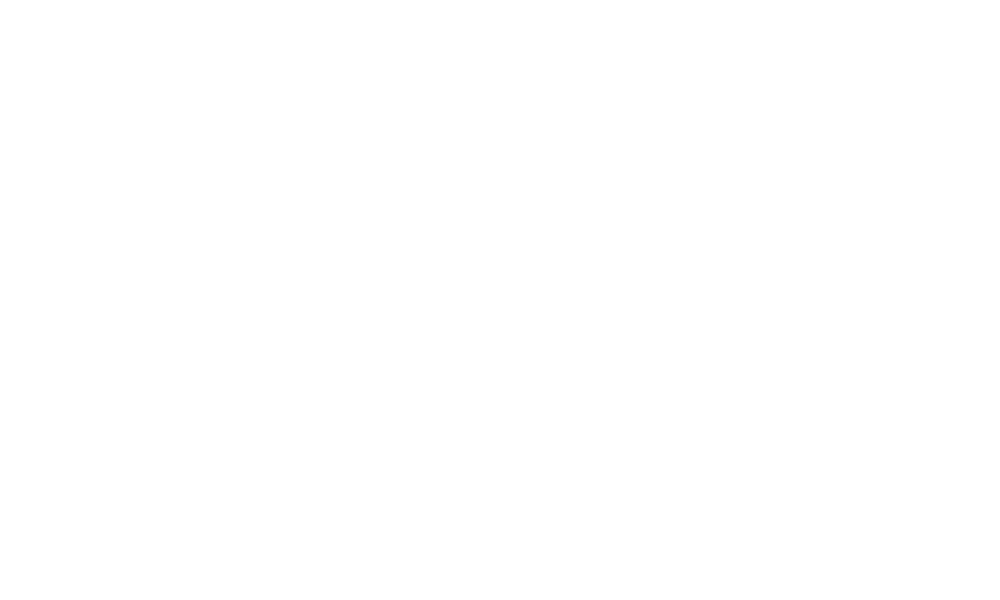

In [15]:
w.interactive_kinetic_by_experiment(data, data_kinetics)